# Итоговая работа Python

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statistics

from collections import Counter
from sklearn import preprocessing
from scipy import stats
from scipy.stats import pearsonr

%matplotlib inline
plt.rcParams["figure.figsize"] = (11, 7) # (w, h)

### Загрузка датасета

In [2]:
DATA_PATH = "hr.csv"

In [3]:
hr = pd.read_csv(DATA_PATH)
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


Как видно, таблица состоит из 14999 записей. Нулевых значений нет. Всего 10 столбцов, из них 2 с типом с плавающей точкой, 6 целочисленных значений и 2 типа объект.

Посмотрим, какие значения принимает параметр sales и salary

In [5]:
hr['sales'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [6]:
hr['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

Нормализуем числовые данные для корректной работы с ними:

In [7]:
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
columns_to_transform = ['satisfaction_level', 'last_evaluation', 'number_project', 
                        'average_montly_hours', 'time_spend_company']
                                   
x_scaled = min_max_scaler.fit_transform(hr[columns_to_transform].values)
hr_norm = pd.DataFrame(x_scaled, columns=columns_to_transform, index = hr.index)

hr[columns_to_transform] = hr_norm

In [8]:
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.318681,0.265625,0.0,0.285047,0.125,0,1,0,sales,low
1,0.780220,0.781250,0.6,0.775701,0.500,0,1,0,sales,medium
2,0.021978,0.812500,1.0,0.822430,0.250,0,1,0,sales,medium
3,0.692308,0.796875,0.6,0.593458,0.375,0,1,0,sales,low
4,0.307692,0.250000,0.0,0.294393,0.125,0,1,0,sales,low


### Основные статистики

In [10]:
hr.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.574542,0.556409,0.360611,0.490889,0.187279,0.144610,0.238083,0.021268
std,0.273220,0.267452,0.246518,0.233379,0.182517,0.351719,0.425924,0.144281
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.384615,0.312500,0.200000,0.280374,0.125000,0.000000,0.000000,0.000000
50%,0.604396,0.562500,0.400000,0.485981,0.125000,0.000000,0.000000,0.000000
75%,0.802198,0.796875,0.600000,0.696262,0.250000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Развернутая информация

In [11]:
def get_mode(column):
    """Выводит значение моды для переменной column"""
    # подсчет количества встречаемости значений
    column_counts = Counter(column)

    # Алгоритм поиска максимума
    maxp = 0
    mode = []  # список, т.к. может быть несколько мод
    column_counts = column_counts.most_common()
    for elem in column_counts:
        if elem[1] >= maxp:
            maxp = elem[1]
            mode.append(elem[0])

    # проверка на наличие моды
    if maxp == 1:
        print('Моды в данном множестве нет, все значения встречаются один раз')
    elif len(mode) >= 2:
        len_mode = len(mode)
        mode = ', '.join(str(e) for e in mode) # перевод списка в строковый вид
        print('Значение моды (данные содержат', len_mode, 'мод(ы):', mode, 'Количество встречаемости:', maxp)
    else:
        mode = ' '.join(str(e) for e in mode) # перевод списка в строковый вид
        print('Значение моды:', mode, 'Количество встречаемости:', maxp)

In [12]:
def get_statistics(column):
    """Выводит основные статистики для переменной column:
    медиану, среднее, стандартное отклонение, минимум, максимум, размах и моду"""
    
    print('Медиана: ', statistics.median(column))
    print('Среднее: ', statistics.mean(column))
    print('Стандартное отклонение: ', statistics.pstdev(column))
    print('Минимум: ', min(column))
    print('Максимум: ', max(column))
    print('Размах: ', max(column) - min(column))
    get_mode(column)
    print('\n')

In [13]:
column_names = hr.columns.values.tolist()[:8]
for column in column_names:
    print('Основные статистики для признака \033[1m', column, '\033[0m')
    get_statistics(hr[column])

Основные статистики для признака  satisfaction_level 
Медиана:  0.6043956043956044
Среднее:  0.574542332126171
Стандартное отклонение:  0.2732113875627179
Минимум:  0.0
Максимум:  0.9999999999999999
Размах:  0.9999999999999999
Значение моды: 0.010989010989011005 Количество встречаемости: 358


Основные статистики для признака  last_evaluation 
Медиана:  0.5625
Среднее:  0.5564089689312621
Стандартное отклонение:  0.2674428195480369
Минимум:  0.0
Максимум:  1.0
Размах:  1.0
Значение моды: 0.2968750000000001 Количество встречаемости: 358


Основные статистики для признака  number_project 
Медиана:  0.4
Среднее:  0.36061070738049206
Стандартное отклонение:  0.2465102530964688
Минимум:  0.0
Максимум:  1.0
Размах:  1.0
Значение моды: 0.4 Количество встречаемости: 4365


Основные статистики для признака  average_montly_hours 
Медиана:  0.4859813084112149
Среднее:  0.4908894237809
Стандартное отклонение:  0.23337118907739335
Минимум:  0.0
Максимум:  0.9999999999999999
Размах:  0.9999999999999

### Корреляционная матрица

Рассчитаем и визуализируем корреляционную матрицу для переменных.

In [14]:
hr.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


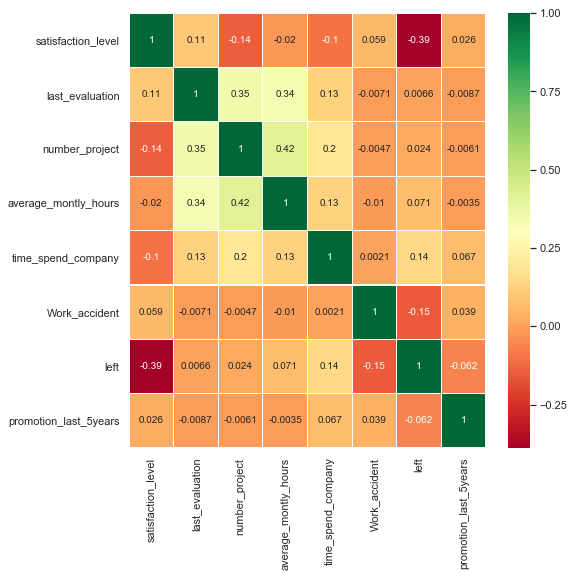

In [34]:
sns.heatmap(hr.corr(), annot=True, cmap='RdYlGn', linewidths=0.2) 
fig = plt.gcf()
fig.set_size_inches(8,8)
plt.show()

Как видно из таблицы, переменные не имеют друг с другом сильной корреляции. Максимальное значение (по модулю) - 0.42. <br>
Максимальную корреляцию друг с другом имеют переменные average_montly_hours	и number_project со значением 0.42 (что логично - чем больше проектов, тем больше потраченного среднего рабочего времени), а также переменные satisfaction_level и left со значением -0.39 (чем меньше уровень удовлетворения, тем больше количество ушедших с работы людей).

### Визуализация взаимосвязей

Посмотрим графики распределения величин.

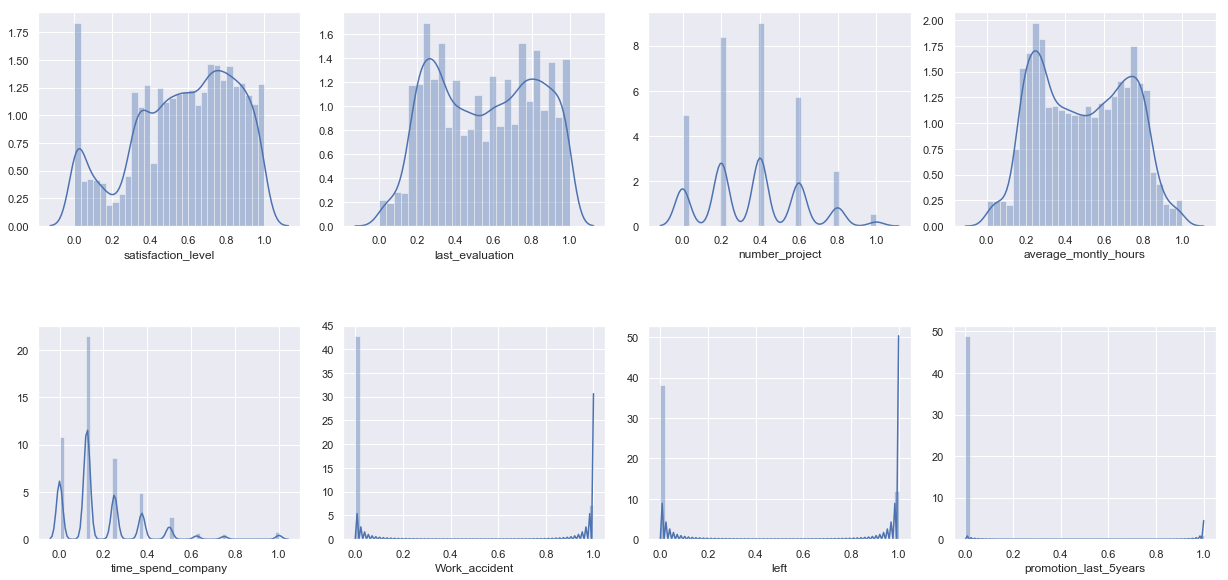

In [16]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(17, 8))
index = 0
axs = axs.flatten()
for k,v in hr[hr.columns.tolist()[:-2]].items():
    sns.distplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show()

Как видно, среди графиков есть биноминальное распределение (work_accident, left, promotion_last_5years), так как датасет содержит бинарные переменные. Также есть дискретные распределения переменных number_project и time_spen_company.

Посмотрим взаимосвязи между некоторыми параметрами.

1) параметры satisfaction_level и time_spend_company - уровень удовлетворения и количество времени, проведенное в компании

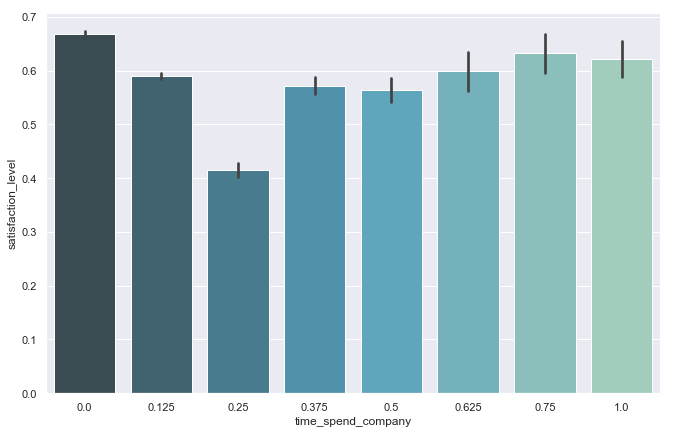

In [35]:
sns.barplot(y="satisfaction_level", x="time_spend_company", data=hr, palette='GnBu_d')
plt.show()

Как видно, самый высокий уровень удовлетворения в самом начале карьеры в компании. Далее уровень удовлетворения достаточно резко падает, снова возрастает и остается примерно на одном и том же уровне оставшееся время.

2) параметры number_project и time_spend_company - количество проектов и количество времени, проведенное в компании

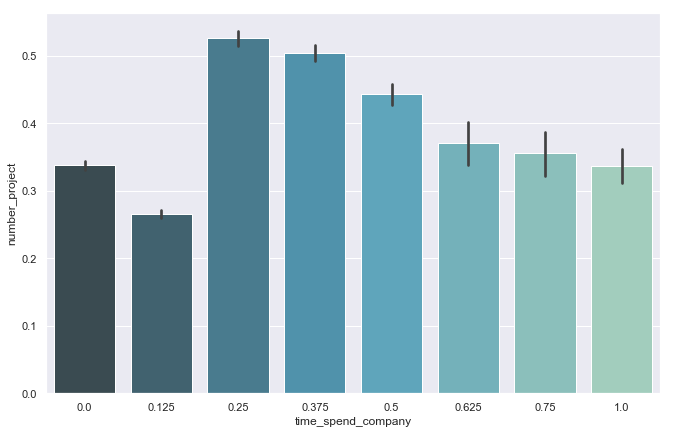

In [58]:
sns.barplot(y="number_project", x="time_spend_company", data=hr, palette='GnBu_d')
plt.show()

Как видно, меньше всего проектов в начале карьеры, больше всего - в середине, к концу проектов опять становится меньше.

2) параметры number_project и satisfaction_level - количество проектов и уровень удовлетворения работой

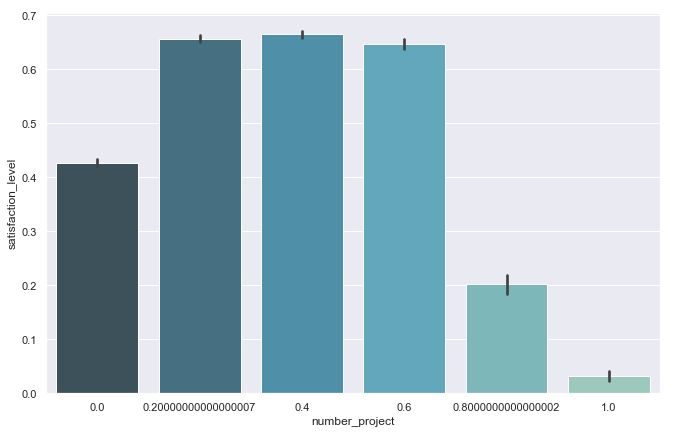

In [64]:
sns.barplot(x="number_project", y="satisfaction_level", data=hr, palette='GnBu_d')
plt.show()

Наименьший уровень удовлетворения работой при большом количестве проектов. 

### Проверка взаимосвязи между несколькими переменными с использованием t-test статистики

1. Проверим взаимосвязь между переменными satisfaction_level и left (уровнем удовлетворения сотрудников и количеством ушедших).

In [22]:
left_satisfaction = hr[hr['left']==1]['satisfaction_level']
stayed_satisfaction = hr[hr['left']==0]['satisfaction_level']

Так как данные в наших выборках не распределены нормально, то используем критерий Манна-Уитни:

In [23]:
u, p_value = stats.mannwhitneyu(left_satisfaction, stayed_satisfaction)
p_value

0.0

P-value равно 0.0, что меньше стандартной альфа ошибки 0.05, поэтому мы отвергаем нулевую гипотезу и можем сказать, что между уровнем удовлетворения ушедших и оставшихся сотрудников есть разница.

Построим график вероятности распределения satisfaction_level в зависимости от параметра left:

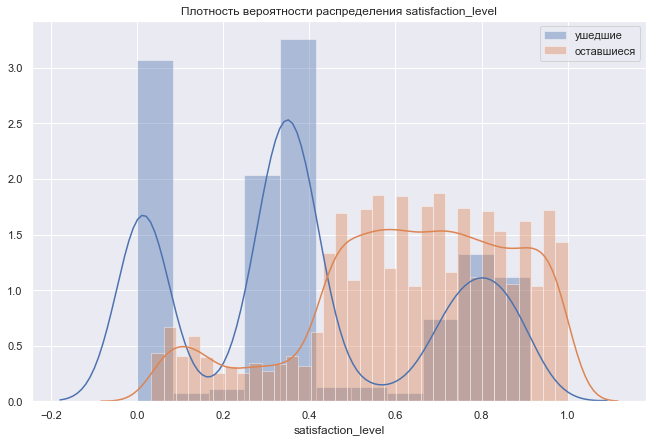

In [36]:
sns.distplot(left_satisfaction)
sns.distplot(stayed_satisfaction)
plt.title('Плотность вероятности распределения satisfaction_level')
plt.legend(['ушедшие', 'оставшиеся'])
plt.show()

Исходя из значения коэффициента корреляции Пирсона этих двух параметров:

In [25]:
pearsonr(hr['satisfaction_level'], hr['left'])

(-0.38837498342411414, 0.0)

можно сделать вывод, что чем меньше уровень удовлетворения, тем больше ушедших сотрудников.

2. Проверим взаимосвязь между переменными satisfaction_level и salary (low/high) (уровнем удовлетворения сотрудников и зарплатой).

In [26]:
low_salary_satisfaction = hr[hr['salary']=='low']['satisfaction_level']
high_salary_satisfaction = hr[hr['salary']=='high']['satisfaction_level']

In [27]:
u, p_value = stats.mannwhitneyu(low_salary_satisfaction, high_salary_satisfaction)
p_value

1.3117365702204594e-05

P-value меньше стандартной альфа ошибки 0.05, поэтому мы отвергаем нулевую гипотезу и можем сказать, что между уровнем удовлетворения сотрудников с маленькой и большой зарплатой есть разница.

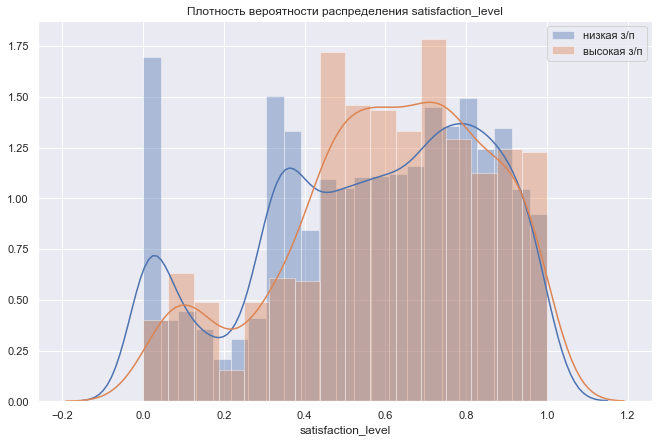

In [37]:
sns.distplot(low_salary_satisfaction)
sns.distplot(high_salary_satisfaction)
plt.title('Плотность вероятности распределения satisfaction_level')
plt.legend(['низкая з/п', 'высокая з/п'])
plt.show()

### Сколько работников работает в каждом департаменте

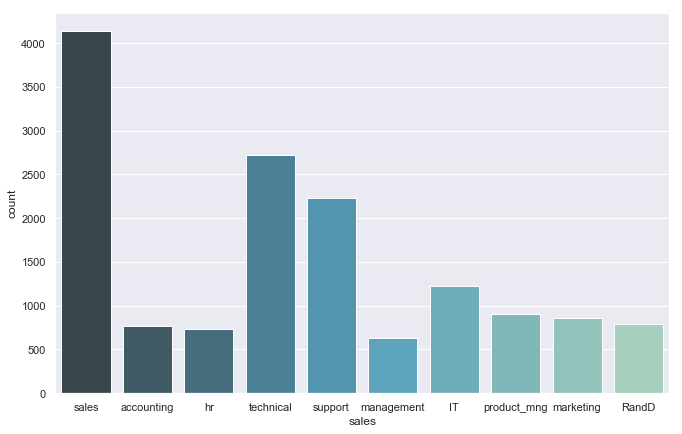

In [38]:
sns.countplot(x="sales", data=hr, palette='GnBu_d')
plt.show()

In [39]:
hr['sales'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: sales, dtype: int64

### Распределение сотрудников по зарплатам

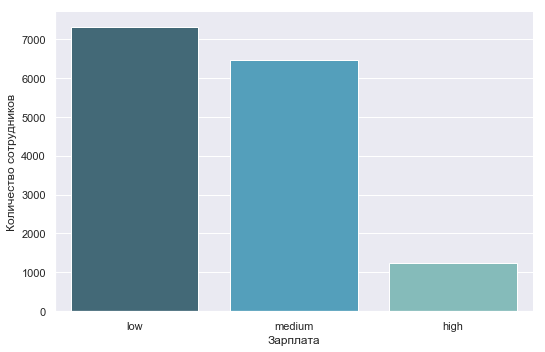

In [40]:
sns.catplot(x="salary", kind="count", data=hr, palette='GnBu_d')
fig = plt.gcf()
fig.set_size_inches(8,5)
plt.xlabel("Зарплата")
plt.ylabel("Количество сотрудников")
plt.show()

### Распределение сотрудников по зарплатам совместно с департаментами

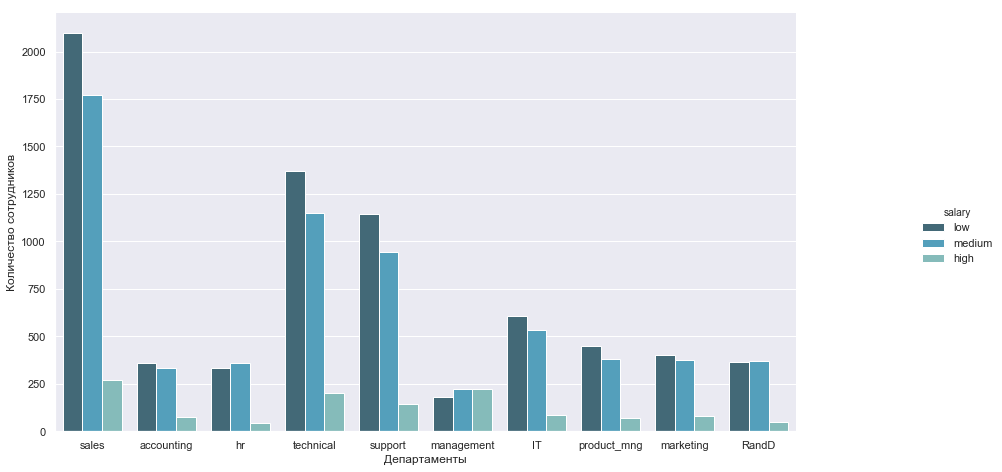

In [41]:
sns.catplot(x='sales', hue='salary', kind='count', data=hr, palette='GnBu_d')
fig = plt.gcf()
fig.set_size_inches(15,7)
plt.xlabel("Департаменты")
plt.ylabel("Количество сотрудников")
plt.show()

### Сколько сотрудников покинули компанию

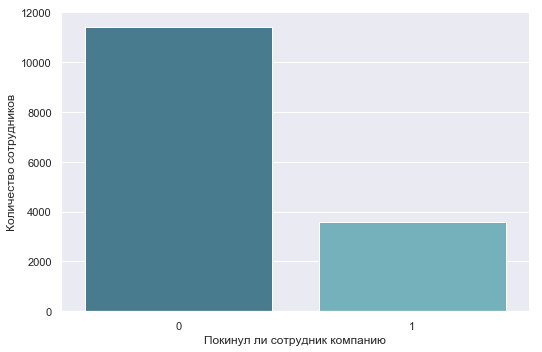

In [42]:
sns.catplot(x="left", kind="count", data=hr, palette='GnBu_d')
fig = plt.gcf()
fig.set_size_inches(8,5)
plt.xlabel("Покинул ли сотрудник компанию")
plt.ylabel("Количество сотрудников")
plt.show()

In [43]:
hr['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

Или короче всего:

In [44]:
len(hr[hr['left']==1])

3571

### Проверка нескольких гипотез для данных, чтобы понять почему сотрудники покидают компанию

Посмотрим распределения и выбросы в данных с помощью boxplot для параметров satisfaction_level, last_evaluation, number_project, average_montly_hours и time_spend_company относительно значения параметра left.

In [45]:
features = ['satisfaction_level', 'last_evaluation', 'number_project',
                       'average_montly_hours', 'time_spend_company', 'left']

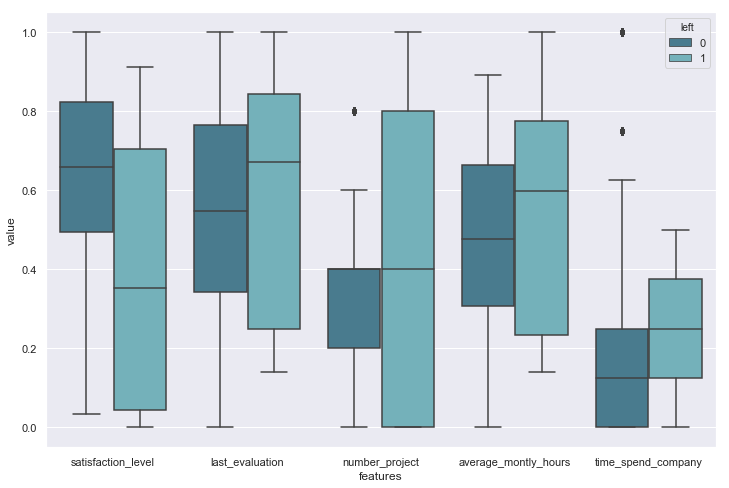

In [46]:
plt.figure(figsize=(12,8))
sns.boxplot(x='features', y="value", hue="left", palette='GnBu_d', data=hr[features].melt(id_vars='left', 
                                                                                          var_name='features', 
                                                                                          value_name='value'))
plt.show()

Из графика, можно сделать вывод, что у людей, которые ушли с работы, был меньше уровень удовлетворения, выше последняя оценка, больше количество проектов, среднее рабочее время в месяц и время, проведенное в компании. Можно выдвинуть гипотезу, что уходят люди, которые уже давно работают в компании, а остаются "новенькие", у которых пока что уровень удовлетворения достаточно высокий.

Проверим взаимосвязь между несчастными случаями на работе и количеством ушедших сотрудников.

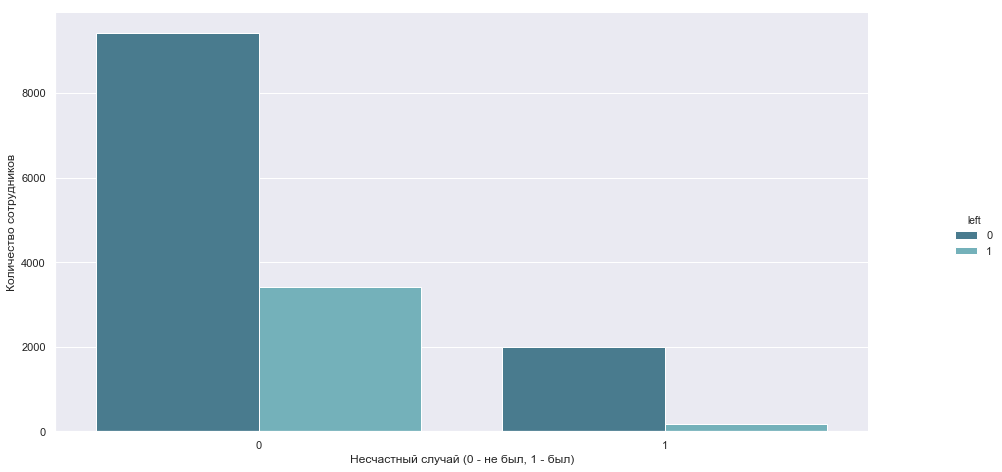

In [52]:
sns.catplot(x='Work_accident', hue='left', kind='count', data=hr, palette='GnBu_d')
fig = plt.gcf()
fig.set_size_inches(15,7)
plt.xlabel("Несчастный случай (0 - не был, 1 - был)")
plt.ylabel("Количество сотрудников")
plt.show()

Как видно, количество ушедших людей, у которых был несчастный случай, очень незначительна. Следовательно, на уход сотрудников несчастные случаи не влияют или влияют незначительно.

Рассмотрим взаимосвязь количества проектов и числом ушедших людей. Как уже было показано ранее, количество проектов влияет на уровень удовлетворения (чем больше проектов, тем меньше уровень удовлетворения + относительно небольшой уровень при самом маленьком числе проектов):

Взаимосвязь между количеством проектов и уровнем удовлетворения:

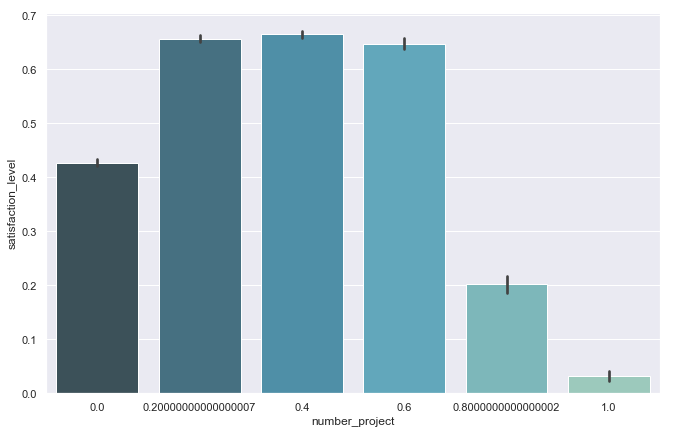

In [66]:
sns.barplot(x="number_project", y="satisfaction_level", data=hr, palette='GnBu_d')
plt.show()

Взаимосвзяь между количеством проектов и количеством ушедших людей:

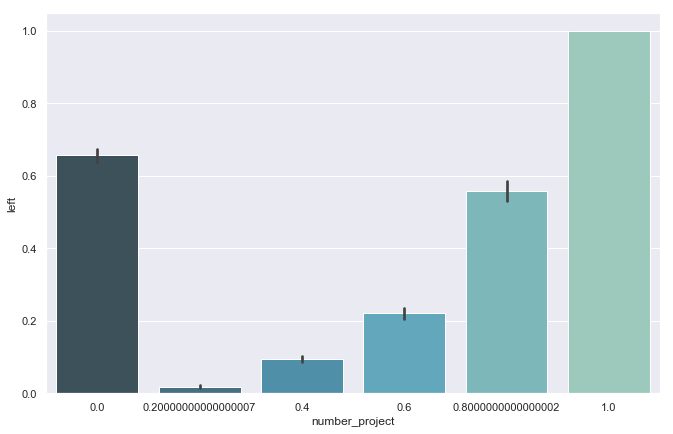

In [67]:
sns.barplot(x="number_project", y="left", data=hr, palette='GnBu_d')
plt.show()

Исходя из графиков, можно выдвинуть гипотезу, что больше всего уходят люди у которых либо очень мало проектов, либо очень много.